# Least Squares Regression - Code Examples

## Non-Linear Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [2]:
# 1. Define the function to fit
def custom_function(x, A, B):
    """
    The custom function to approximate the data.
    f(x; A, B) = A * (np.exp(-B * x) - 1) + 100
    """
    return A * (np.exp(-B * x) - 1) + 100

In [3]:
# 2. Prepare the datasets
# Dataset 1
data1_x = np.array([0, 5, 25, 34, 42, 57, 97])
data1_y = np.array([100, 79.7, 51.3, 44.6, 39.8, 29.9, 10.3])

# Dataset 2
data2_x = np.array([0, 19, 45, 104, 191, 294, 391])
data2_y = np.array([100, 80.4, 66.4, 50.1, 41.2, 28.5, 20.1])

# Dataset 3
data3_x = np.array([0, 23, 51, 98, 196, 292, 401])
data3_y = np.array([100, 87.8, 77, 65.7, 50.9, 46.5, 44.4])

# Combine datasets into a list for easier iteration
datasets = [
    {"name": "Dataset 1", "x": data1_x, "y": data1_y},
    {"name": "Dataset 2", "x": data2_x, "y": data2_y},
    {"name": "Dataset 3", "x": data3_x, "y": data3_y},
]

In [4]:
# 3. Perform curve fitting and analysis for each dataset
results = []

for i, dataset in enumerate(datasets):
    print(f"\n--- Fitting {dataset['name']} ---")
    x_data = dataset["x"]
    y_data = dataset["y"]

    # Initial guess for parameters A and B
    # It's important to provide reasonable initial guesses for non-linear fitting
    # Based on the function A * (exp(-B*x) - 1) + 100:
    # When x=0, y = A * (exp(0) - 1) + 100 = A * (1 - 1) + 100 = 100.
    # This means the function always starts at 100 for x=0, which matches our data.
    # For large x, exp(-B*x) approaches 0, so y approaches A * (-1) + 100 = 100 - A.
    # If y decreases, A must be positive.
    # B determines the decay rate; a small positive B means slow decay.
    # Let's try initial guesses, e.g., A=50, B=0.01
    initial_guess = [50, 0.01]

    try:
        # curve_fit returns:
        # popt: Optimal values for the parameters so that the sum of the squared residuals is minimized.
        # pcov: The estimated covariance of popt.
        popt, pcov = curve_fit(custom_function, x_data, y_data, p0=initial_guess)
        A_fit, B_fit = popt

        # Calculate standard errors from the covariance matrix
        # The diagonal elements of pcov are the variances of the parameters
        perr = np.sqrt(np.diag(pcov))
        A_err, B_err = perr

        print(f"Fitted parameters: A = {A_fit:.4f} +/- {A_err:.4f}, B = {B_fit:.4f} +/- {B_err:.4f}")

        # Generate predicted y values using the fitted function
        y_predicted = custom_function(x_data, A_fit, B_fit)

        # Calculate metrics
        # Residual Sum of Squares (RSS)
        rss = np.sum((y_data - y_predicted)**2)
        print(f"Residual Sum of Squares (RSS): {rss:.4f}")

        # Root Mean Squared Error (RMSE)
        rmse = np.sqrt(rss / len(y_data))
        print(f"Root Mean Squared Error 2 (RMSE): {rmse:.4f}")

        # Standard Error of the Regression (SER)
        ser = np.sqrt(rss / (len(y_data) - len(popt)))
        print(f"Standard Error of the Regression (SER): {ser:.4f}")

        # Total Sum of Squares (TSS)
        y_mean = np.mean(y_data)
        tss = np.sum((y_data - y_mean)**2)
        print(f"Total Sum of Squares (TSS): {tss:.4f}")

        # R-squared (Coefficient of Determination)
        # Using sklearn's r2_score for convenience, which calculates 1 - (RSS/TSS)
        r_squared = r2_score(y_data, y_predicted)
        print(f"R-squared: {r_squared:.4f}")

        # Adjusted R-squared calculation
        n = len(x_data) # Number of data points
        k = len(popt)  # Number of parameters (A, B)
        # Ensure n - k is not zero or negative to avoid division by zero
        if (n - k) > 0:
            adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k)
            print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")
        else:
            adjusted_r_squared = np.nan # Not applicable if degrees of freedom are insufficient
            print("Adjusted R-squared: Not applicable (insufficient degrees of freedom)")

        Value_for_x_0 = custom_function(0, A_fit, B_fit)
        print(f"Value for x=0 (Expected value is 100): {Value_for_x_0:.4f}")


        results.append({
            "name": dataset["name"],
            "x_data": x_data,
            "y_data": y_data,
            "y_predicted": y_predicted,
            "A_fit": A_fit,
            "B_fit": B_fit,
            "A_err": A_err, # Store errors
            "B_err": B_err, # Store errors
            "rss": rss,
            "rmse": rmse,
            "ser": ser,
            "r_squared": r_squared,
            "adjusted_r_squared": adjusted_r_squared # Store adjusted R-squared
        })

    except RuntimeError as e:
        print(f"Error: Could not fit curve for {dataset['name']}. {e}")
        results.append({
            "name": dataset["name"],
            "x_data": x_data,
            "y_data": y_data,
            "error": str(e)
        })


--- Fitting Dataset 1 ---
Fitted parameters: A = 93.5355 +/- 7.6189, B = 0.0270 +/- 0.0048
Residual Sum of Squares (RSS): 111.1352
Root Mean Squared Error 2 (RMSE): 3.9845
Standard Error of the Regression (SER): 4.7146
Total Sum of Squares (TSS): 5492.6000
R-squared: 0.9798
Adjusted R-squared: 0.9757
Value for x=0 (Expected value is 100): 100.0000

--- Fitting Dataset 2 ---
Fitted parameters: A = 75.2997 +/- 4.3607, B = 0.0110 +/- 0.0020
Residual Sum of Squares (RSS): 134.1877
Root Mean Squared Error 2 (RMSE): 4.3783
Standard Error of the Regression (SER): 5.1805
Total Sum of Squares (TSS): 4934.4171
R-squared: 0.9728
Adjusted R-squared: 0.9674
Value for x=0 (Expected value is 100): 100.0000

--- Fitting Dataset 3 ---
Fitted parameters: A = 56.6753 +/- 0.5420, B = 0.0099 +/- 0.0003
Residual Sum of Squares (RSS): 1.8090
Root Mean Squared Error 2 (RMSE): 0.5084
Standard Error of the Regression (SER): 0.6015
Total Sum of Squares (TSS): 2811.9943
R-squared: 0.9994
Adjusted R-squared: 0.99


---

R-squared (coefficient of determination) $R^2$ remains a valuable tool for comparing different non-linear models fitted to the *same dataset*. If you tried another non-linear function on the same data, you could compare their R-squared values to see which one provides a better fit. However, in our case we use the same model for different datasets, so that's not a good idea to compare $R^2$ values between these datasets. Also, we need to use $R^2$ with caution (see the details [here](../least-squares-regression.ipynb))

While a high $R^2$ is good, it doesn't guarantee that our non-linear model is the "correct" physical model or that it will extrapolate well. It only indicates how well it fits the *observed data*. Overfitting can still occur, especially with complex non-linear functions and limited data.

Just like with linear models, if you are comparing non-linear models with different numbers of parameters, the raw $R^2$ can be misleading (it tends to increase with more parameters). In such cases, **adjusted R-squared** is a better metric as it penalizes for model complexity.

In summary, for our non-linear function fitted with `scipy.optimize.curve_fit`, R-squared is a valid and useful metric, but not primary metric.

---

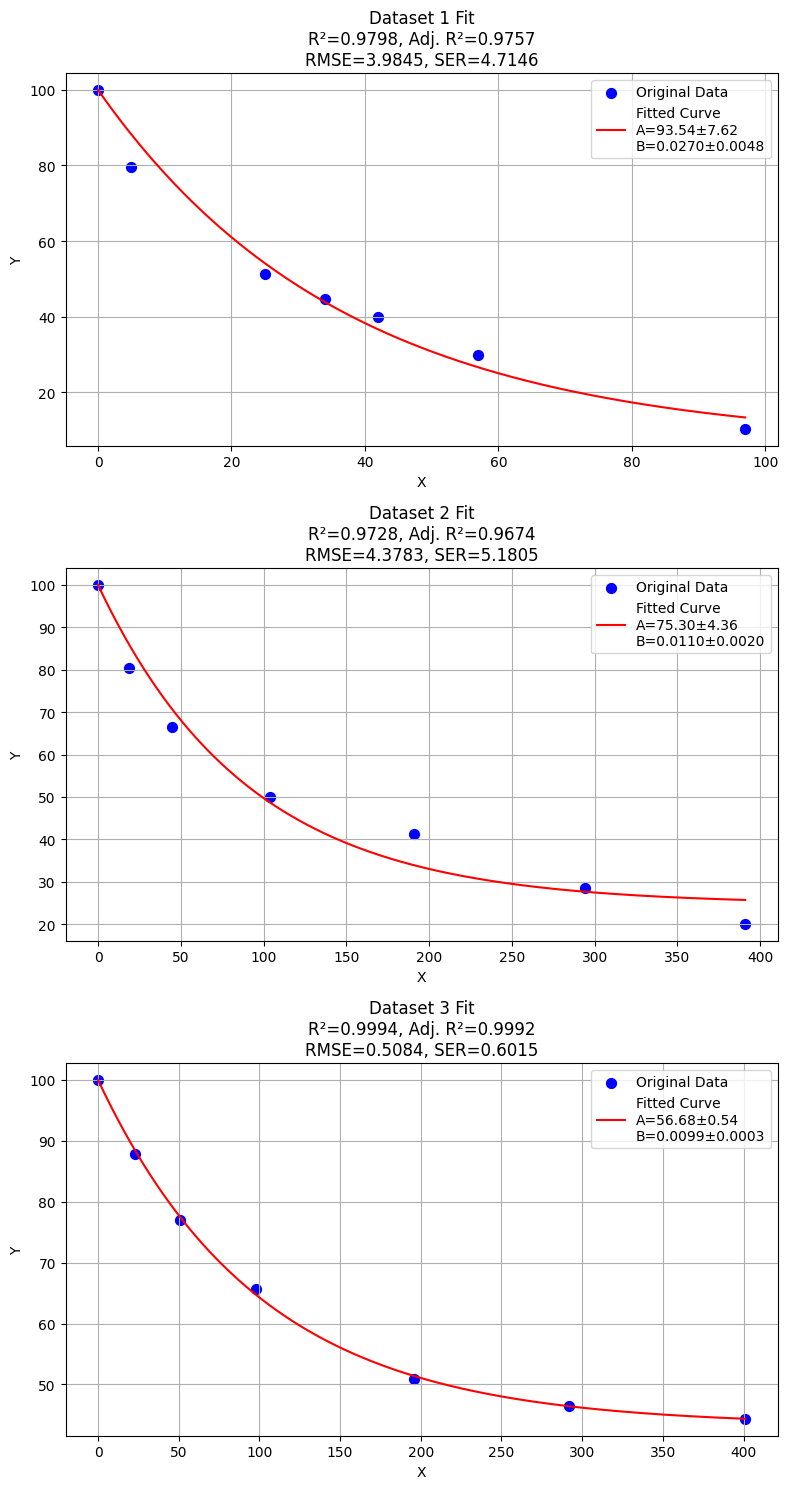

In [5]:
# 4. Plotting the results
plt.figure(figsize=(8, 15))

for i, res in enumerate(results):
    plt.subplot(len(results), 1, i + 1)
    plt.scatter(res["x_data"], res["y_data"], label="Original Data", color='blue', s=50)

    if "y_predicted" in res:
        # Create a smoother curve for plotting
        x_plot = np.linspace(min(res["x_data"]), max(res["x_data"]), 500)
        y_plot = custom_function(x_plot, res["A_fit"], res["B_fit"])
        plt.plot(x_plot, y_plot, color='red', label=f"Fitted Curve\nA={res['A_fit']:.2f}±{res['A_err']:.2f}\nB={res['B_fit']:.4f}±{res['B_err']:.4f}")
        
        if not np.isnan(res['adjusted_r_squared']):
            plt.title(f"{res['name']} Fit\nR²={res['r_squared']:.4f}, Adj. R²={res['adjusted_r_squared']:.4f}\nRMSE={res['rmse']:.4f}, SER={res['ser']:.4f}")
        else:
            plt.title(f"{res['name']} Fit\nR²={res['r_squared']:.4f}, RMSE={res['rmse']:.4f}\nAdj. R²: N/A")
    else:
        plt.title(f"{res['name']} (Fit Error)")
        plt.text(0.5, 0.5, f"Error: {res['error']}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, color='red')

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


## Comparison of various algorithm for linear problem

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np

np.random.seed(42)

# Sample data (e.g., y = 2*x + 5 + noise)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(-1, 1) # X needs to be 2D for sklearn
y = np.array([7, 9, 11, 13, 15, 17, 19, 21]) + np.random.randn(8) * 0.5

model = LinearRegression()
model.fit(X, y)

print(f"Intercept: {model.intercept_}")
print(f"Coefficient (slope): {model.coef_[0]}")
print(f"R-squared: {model.score(X, y)}") # Coefficient of determination

Intercept: 5.112619361741471
Coefficient (slope): 2.0361891065482367
R-squared: 0.9949303922700998


In [7]:
import statsmodels.api as sm
import numpy as np
import pandas as pd # often used with statsmodels

np.random.seed(42)

# Sample data (e.g., y = 2*x + 5 + noise)
x = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(-1, 1) # X needs to be 2D for sklearn
y = np.array([7, 9, 11, 13, 15, 17, 19, 21]) + np.random.randn(8) * 0.5

# Add a constant to the independent variable for the intercept
X = sm.add_constant(x)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1178.
Date:                Fri, 22 Aug 2025   Prob (F-statistic):           4.08e-08
Time:                        00:02:15   Log-Likelihood:                -2.5554
No. Observations:                   8   AIC:                             9.111
Df Residuals:                       6   BIC:                             9.270
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1126      0.300     17.062      0.0

In [8]:
from scipy import stats
import numpy as np

np.random.seed(42)

# Sample data (e.g., y = 2*x + 5 + noise)
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([7, 9, 11, 13, 15, 17, 19, 21]) + np.random.randn(8) * 0.5

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error of the slope: {std_err}")

Slope: 2.0361891065482363
Intercept: 5.112619361741473
R-squared: 0.9949303922700999
P-value: 4.079439162311038e-08
Standard Error of the slope: 0.059338055969359385


In [9]:
import numpy as np
from scipy.optimize import curve_fit

def linear_function(x, a, b):
    return a * x + b

np.random.seed(42)

# Sample data (e.g., y = 2*x + 5 + noise)
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([7, 9, 11, 13, 15, 17, 19, 21]) + np.random.randn(8) * 0.5

# p0 is an optional initial guess for the parameters (a, b).
popt, pcov = curve_fit(linear_function, x, y, p0=[1, 1])

# popt contains the optimal parameters (a, b)
slope_curve_fit = popt[0]
intercept_curve_fit = popt[1]

perr = np.sqrt(np.diag(pcov))
std_err_slope_curve_fit = perr[0]
std_err_intercept_curve_fit = perr[1]

print(f"Optimal Slope (a): {slope_curve_fit:.4f} +/- {std_err_slope_curve_fit:.4f}")
print(f"Optimal Intercept (b): {intercept_curve_fit:.4f} +/- {std_err_intercept_curve_fit:.4f}\n")


Optimal Slope (a): 2.0362 +/- 0.0593
Optimal Intercept (b): 5.1126 +/- 0.2996

